# CM2604 Machine Learning Coursework
### S.C. Thennakoon | IIT - 20232005 | RGU - 2330960

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import tensorflow as tf

In [4]:
import joblib
import keras_tuner as kt

## Data Preprocessing

### Data Collection and Cleaning

On initial glance the csv files are seperated with `;` instead of `,`. And there happens to be seperated `bank` and `bank-addtional` files 

In [5]:
bank = pd.read_csv("bank+marketing/bank/bank.csv", sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
bank_full = pd.read_csv("bank+marketing/bank/bank-full.csv", sep=';')
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
bank_additional = pd.read_csv("bank+marketing/bank-additional/bank-additional.csv", sep=';')
bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [8]:
bank_additional_full = pd.read_csv("bank+marketing/bank-additional/bank-additional-full.csv", sep=';')
bank_additional_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
bank.isna().sum(), bank_full.isna().sum(), bank_additional.isna().sum(), bank_additional_full.isna().sum()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y    

There are no na or null values present in the 4 dataframes

In [10]:
common_rows_bank = bank_full.merge(bank)
common_rows_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
1,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
2,57,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
3,57,technician,married,secondary,no,839,no,yes,unknown,5,may,225,1,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,35,technician,married,secondary,no,0,yes,no,cellular,9,nov,524,1,96,5,success,yes
4517,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
4518,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
4519,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes


In [11]:
common_rows_bank_additional = bank_additional_full.merge(bank_additional)
common_rows_bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,32,entrepreneur,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,38,admin.,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,55,technician,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
4116,38,housemaid,divorced,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,yes
4117,32,admin.,married,university.degree,no,yes,no,cellular,nov,wed,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
4118,57,retired,married,professional.course,no,yes,no,cellular,nov,thu,...,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no


Every row in both of `bank` and `bank-additional` are present in `bank-full` and `bank-additional-full`, the representations are 10% of the original datasets. Therefore we can safely ignore the smaller dataset and proceed with the larger `bank-full` and `bank-additional-full`.

In [12]:
bank_additional_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

There are additioanl 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' in the `bank-additional` dataset

In [13]:
common_columns = bank_additional_full.columns.intersection(bank_full.columns)
common_columns_dataframe = bank_additional_full[common_columns]
common_columns_dataframe

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,yes


In [14]:
common_rows_bank_all = common_columns_dataframe.merge(bank_full)
common_columns_dataframe

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,yes


Every row in the in `bank-full` is in `bank-additional-full`, Therefore Project will the done with the use of `bank-additional-full` dataset because of more data.

In [15]:
bank_additional_full.drop_duplicates(inplace=True)
bank_additional_full.shape

(41176, 21)

In [16]:
bank_additional_full['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

### Data Visualization and Exploratory Data Analysis

In [17]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [18]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
bank_additional_full['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [20]:
bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
#sns.pairplot(bank_additional_full, hue='y')

Data is appeared to be heavily clustered and some outliers can be seen

<Axes: ylabel='duration'>

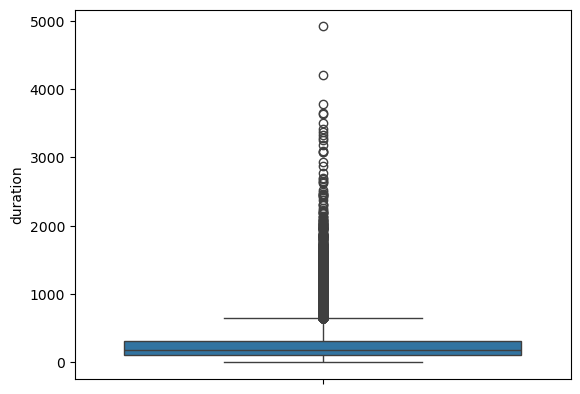

In [22]:
sns.boxplot(bank_additional_full['duration'])

There appears to be some outliers present in the `duration` column (visualized in the box plot above), by using a 0.05 - 0.95 confidence interval we can eleminate the outliers

In [23]:
def remove_outliers_iqr(data:pd.DataFrame, columns):
    data_copy = data.copy()
    for column in columns:
        Q1 = data_copy[column].quantile(0.05)
        Q3 = data_copy[column].quantile(0.95)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_copy.drop(data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)].index, inplace=True)

    return data_copy

<Axes: ylabel='duration'>

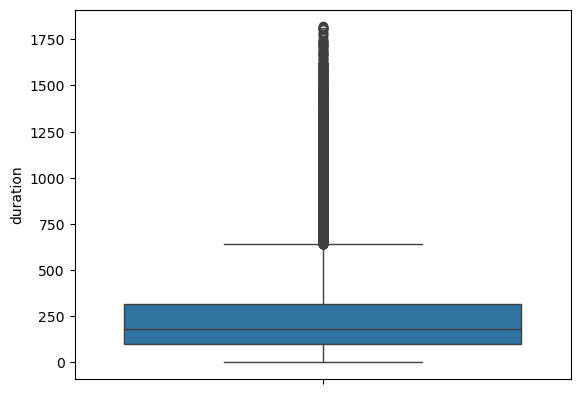

In [24]:
bank_additional_full_rm_outliers = remove_outliers_iqr(bank_additional_full, ['duration'])
sns.boxplot(bank_additional_full_rm_outliers['duration'])

In [25]:
bank_additional_full.shape[0] - bank_additional_full_rm_outliers.shape[0]

93

93 records were removed from the dataset

### Encoding

In [26]:
bank_additional_full_rm_outliers.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [27]:
bank_additional_full_encoded = bank_additional_full_rm_outliers.copy()

In [28]:
label_encoders = {}
for column in bank_additional_full_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    bank_additional_full_encoded[column] = le.fit_transform(bank_additional_full_encoded[column])
    label_encoders[column] = le

In [29]:
label_encoders

{'job': LabelEncoder(),
 'marital': LabelEncoder(),
 'education': LabelEncoder(),
 'default': LabelEncoder(),
 'housing': LabelEncoder(),
 'loan': LabelEncoder(),
 'contact': LabelEncoder(),
 'month': LabelEncoder(),
 'day_of_week': LabelEncoder(),
 'poutcome': LabelEncoder(),
 'y': LabelEncoder()}

In [30]:
bank_additional_full_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


There are 20 features in the dataset Dimentionality reduction can be performed to reduce the number of features. Principal Component Analysis will be used.

In [31]:
y = bank_additional_full_encoded['y']
bank_additional_full_encoded.drop(columns=['y'], inplace=True)
bank_additional_full_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [32]:
scaler = StandardScaler()
bank_additional_full_encoded_scaled = scaler.fit_transform(bank_additional_full_encoded)
bank_additional_full_encoded_scaled = pd.DataFrame(bank_additional_full_encoded_scaled, columns=bank_additional_full_encoded.columns)
bank_additional_full_encoded_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533190,-0.201757,-0.283713,-1.753862,-0.513786,-1.087555,-0.452456,1.318730,0.762623,-0.718799,0.031264,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
1,1.629162,0.911057,-0.283713,-0.349768,1.944619,-1.087555,-0.452456,1.318730,0.762623,-0.718799,-0.439592,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
2,-0.290267,0.911057,-0.283713,-0.349768,-0.513786,0.942294,-0.452456,1.318730,0.762623,-0.718799,-0.115878,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
3,-0.002352,-1.036368,-0.283713,-1.285830,-0.513786,-1.087555,-0.452456,1.318730,0.762623,-0.718799,-0.431183,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
4,1.533190,0.911057,-0.283713,-0.349768,-0.513786,-1.087555,2.311799,1.318730,0.762623,-0.718799,0.224651,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41078,3.164704,0.354650,-0.283713,0.586295,-0.513786,0.942294,-0.452456,-0.758305,1.193737,-1.434186,0.338161,-0.565919,0.195472,-0.349724,0.192932,-0.752379,2.058162,-2.225232,-1.495058,-2.815687
41079,0.573476,-0.758165,-0.283713,0.586295,-0.513786,-1.087555,-0.452456,-0.758305,1.193737,-1.434186,0.544161,-0.565919,0.195472,-0.349724,0.192932,-0.752379,2.058162,-2.225232,-1.495058,-2.815687
41080,1.533190,0.354650,-0.283713,1.054327,-0.513786,0.942294,-0.452456,-0.758305,1.193737,-1.434186,-0.271429,-0.205202,0.195472,-0.349724,0.192932,-0.752379,2.058162,-2.225232,-1.495058,-2.815687
41081,0.381533,1.467464,-0.283713,0.586295,-0.513786,-1.087555,-0.452456,-0.758305,1.193737,-1.434186,0.792201,-0.565919,0.195472,-0.349724,0.192932,-0.752379,2.058162,-2.225232,-1.495058,-2.815687


In [33]:
pca = PCA()
pca_data = pca.fit(bank_additional_full_encoded_scaled)

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21354143, 0.29779302, 0.3748415 , 0.44277212, 0.49972389,
       0.55439774, 0.60620029, 0.65660847, 0.70577383, 0.75346318,
       0.79969728, 0.84517678, 0.88815056, 0.92535568, 0.9545916 ,
       0.9822892 , 0.99509967, 0.99862793, 0.9996506 , 1.        ])

In [35]:
pca_17_components = PCA(n_components=17)
pca_17_component_data = pca_17_components.fit_transform(bank_additional_full_encoded_scaled)

In [36]:
pca_columns = [f"PC{i+1}" for i in range(pca_17_components.n_components)]
X_pca_df = pd.DataFrame(pca_17_component_data, columns=pca_columns)

In [37]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1.634493,-1.215158,1.680225,0.786255,0.435728,-0.272886,-0.636081,-0.797544,-0.683996,-0.338711,-0.086107,-0.424856,-0.299985,-1.476659,0.615072,0.753890,-0.097747
1,1.894664,-1.312172,1.742439,0.271903,1.174663,0.201100,-0.698616,-0.306903,-0.732815,0.787857,1.503262,-0.545424,0.223157,0.488985,0.347485,0.435711,-0.067214
2,1.437172,-0.694906,-0.092316,0.843711,1.102452,-0.051115,0.608677,-0.272965,-0.495419,1.227785,-0.600044,-0.210468,-0.524487,-0.847384,-0.156511,-0.274099,-0.026546
3,1.608959,-0.827011,0.858460,1.415343,0.033963,-0.065024,-0.541161,-1.087795,-0.303948,-0.683564,-0.358166,-1.010807,-0.248674,-1.033123,-0.048034,-0.043968,0.005640
4,1.545721,-1.154007,0.823841,0.359254,1.252194,0.074874,1.187523,0.316029,-1.894686,-1.408891,0.964645,0.152177,-0.475492,-0.752293,0.655880,0.731153,-0.142450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41078,-2.019814,-0.501712,1.857998,-0.173483,0.097774,0.682373,0.149976,-0.415974,-1.586739,1.230670,-1.178606,0.986402,-1.896406,1.447755,2.652501,1.573865,2.496664
41079,-1.966143,-0.093133,0.788430,1.224916,-0.799790,0.455309,-1.147735,-0.820318,-1.764597,-0.311457,-0.772147,0.531673,-1.752975,1.606308,1.381675,0.278851,2.643583
41080,-2.020667,-0.096799,0.830207,0.356184,0.078154,1.212134,0.200902,-0.568947,-1.178212,1.184671,-1.077719,0.881554,-1.977250,1.685448,1.886289,0.723960,2.605867
41081,-2.005841,-0.149397,0.290734,0.981377,0.200524,0.427705,-1.295980,-0.221853,-2.217676,0.609228,0.148225,1.458621,-2.295614,1.102086,1.191551,0.161171,2.621192


## Training

### Random Forest 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

In [39]:
randomforest = RandomForestClassifier(n_jobs=-1, n_estimators=200)
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [40]:
rf_predictions = randomforest.predict(X_test)

In [41]:
print(confusion_matrix(y_pred=rf_predictions, y_true=y_test))

[[7086  225]
 [ 513  393]]


In [42]:
print(classification_report(y_pred=rf_predictions, y_true=y_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7311
           1       0.64      0.43      0.52       906

    accuracy                           0.91      8217
   macro avg       0.78      0.70      0.73      8217
weighted avg       0.90      0.91      0.90      8217



In [45]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [48]:
param_grid = {
    'n_estimators': range(200,1000,200),
    'max_features': ['sqrt', 'log2'],
    'max_depth': range(1, 51, 2),
    'min_samples_split': range(2, 15, 2),
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier()
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring=auc_scoring, cv = 2, n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Best parameters found: ", rf_search.best_params_)
print("Best precision found: ", rf_search.best_score_)

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 41, 'criterion': 'gini'}
Best precision found:  0.6917343538506673


In [49]:
# Define the model with the specified hyperparameters
optimized_rf_model = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=8,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=41,
    criterion='gini',
    n_jobs=-1
)

# Train the model
optimized_rf_model.fit(X_train, y_train)

# Make predictions
optimized_rf_predictions = optimized_rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_pred=optimized_rf_predictions, y_true=y_test))
print(classification_report(y_pred=optimized_rf_predictions, y_true=y_test))

[[7099  212]
 [ 521  385]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7311
           1       0.64      0.42      0.51       906

    accuracy                           0.91      8217
   macro avg       0.79      0.70      0.73      8217
weighted avg       0.90      0.91      0.90      8217



### Tensorflow

#### Class imbalance fixing

In [45]:
y_value_count = bank_additional_full_rm_outliers['y'].value_counts()
minority_class_len = y_value_count[1]
y_value_count, minority_class_len

/var/folders/lt/y3jky1md7pb_wvwzblnhhmyh0000gn/T/ipykernel_6025/433234353.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  minority_class_len = y_value_count[1]


(y
 no     36501
 yes     4582
 Name: count, dtype: int64,
 4582)

As we can see in the dataset there is a significant imbalance between yes and no classes. Deep Neural Networks tend to perform worse with the class imbalances therefore class imbalance need to be fixed. Due to nature of dataset undersampling is selected to fix the class imbalance.

In [46]:
minority = bank_additional_full_rm_outliers[bank_additional_full_rm_outliers['y'] == 'yes']
majority = bank_additional_full_rm_outliers[bank_additional_full_rm_outliers['y'] == 'no']
majority_undersampled = majority.sample(minority_class_len, random_state=42)
majority_minority_combined = pd.concat([minority, majority_undersampled])
majority_minority_combined

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26854,31,blue-collar,single,basic.9y,no,yes,no,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
34662,30,admin.,single,high.school,no,yes,no,cellular,may,thu,...,7,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
30331,54,management,married,university.degree,no,no,no,telephone,apr,thu,...,1,2,1,success,-1.8,93.075,-47.1,1.365,5099.1,no
18715,41,blue-collar,married,basic.6y,no,no,no,telephone,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


#### Preprocessing the Balanced Dataset

In [47]:
y_bal = majority_minority_combined['y']
majority_minority_combined.drop(columns=['y'], inplace=True)

In [48]:
for column in majority_minority_combined.select_dtypes(include='object').columns:
    le = label_encoders.get(column)
    majority_minority_combined[column] = le.fit_transform(majority_minority_combined[column])

In [49]:
majority_minority_combined_scaled = scaler.fit_transform(majority_minority_combined)
majority_minority_combined_scaled = pd.DataFrame(majority_minority_combined_scaled, columns=majority_minority_combined.columns)
majority_minority_combined_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.048556,-0.786330,-1.926870,-1.815991,2.311248,0.935820,-0.455722,1.597048,0.713208,-0.738020,3.715283,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
1,0.707761,-0.510495,-0.326849,0.988639,2.311248,0.935820,-0.455722,1.597048,0.713208,-0.738020,2.062227,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
2,0.707761,1.420355,-0.326849,-0.881114,-0.432667,-1.095651,-0.455722,1.597048,0.713208,-0.738020,3.380330,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
3,0.048556,1.420355,-0.326849,0.521201,2.311248,0.935820,-0.455722,1.597048,0.713208,-0.738020,0.626271,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
4,0.378158,-0.786330,-0.326849,-0.881114,2.311248,0.935820,-0.455722,1.597048,0.713208,-0.738020,0.260304,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159,-0.775451,-0.786330,1.273173,-0.881114,-0.432667,0.935820,-0.455722,-0.626155,1.114795,-0.021957,-0.750759,-0.142131,0.356430,-0.448124,0.021723,0.225232,-0.442600,-0.342488,0.584736,0.689571
9160,-0.857852,-1.062166,1.273173,-0.413676,-0.432667,0.935820,-0.455722,-0.626155,0.713208,-0.021957,-0.288647,2.046925,0.356430,-0.448124,0.021723,-0.759595,-0.926836,-1.126704,-0.900407,-0.419690
9161,1.119764,0.041177,-0.326849,0.988639,-0.432667,-1.095651,-0.455722,1.597048,-1.696317,-0.021957,-0.837598,-0.579942,-2.818128,0.983250,2.162254,-0.759595,-0.639765,-1.294750,-0.848084,-0.419690
9162,0.048556,-0.786330,-0.326849,-1.348552,-0.432667,-1.095651,-0.455722,1.597048,-0.491555,-0.021957,-1.153943,0.295680,0.356430,-0.448124,0.021723,1.094197,0.689913,-0.473191,1.056177,1.060089


#### Tensor Conversion

In [ ]:
y_bal = y_bal.map({'no': 0, 'yes': 1})
X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(majority_minority_combined_scaled, y_bal, test_size=0.2, random_state=42)

X_train_bal = tf.convert_to_tensor(X_train_bal, dtype=tf.float32)
X_val_bal = tf.convert_to_tensor(X_val_bal, dtype=tf.float32)
y_train_bal = tf.convert_to_tensor(y_train_bal.values, dtype=tf.int32)
y_val_bal = tf.convert_to_tensor(y_val_bal.values, dtype=tf.int32)

2024-12-19 13:35:29.224611: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-19 13:35:29.224648: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-19 13:35:29.224651: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-19 13:35:29.225093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-19 13:35:29.225459: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [51]:
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_bal, y_train_bal)).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_bal, y_val_bal)).batch(BATCH_SIZE)

#### Model Building

In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(8, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='bank_marketing_model')

model.summary()

Model: "bank_marketing_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

callbacks = [early_stopping, tensorboard_callback, model_checkpoint]

In [89]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Model Training

In [90]:
model.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=callbacks)

Epoch 1/100


230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7651 - loss: 0.4780 - val_accuracy: 0.8527 - val_loss: 0.3692
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8528 - loss: 0.3704 - val_accuracy: 0.8554 - val_loss: 0.3669
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8493 - loss: 0.3662 - val_accuracy: 0.8522 - val_loss: 0.3675
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8543 - loss: 0.3621 - val_accuracy: 0.8560 - val_loss: 0.3642
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8580 - loss: 0.3628 - val_accuracy: 0.8554 - val_loss: 0.3641
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8555 - loss: 0.3594 - val_accuracy: 0.8571 - val_loss: 0.3604
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8515 - loss: 0.3684 - val_accuracy: 0.8549 - val_loss: 0.3619
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8482 - loss: 0.3718 - val_accuracy

In [47]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train_bal.shape[1],)
    ))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        model.add(tf.keras.layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='bank_marketing_tuning'
)

tuner.search(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print all the hyperparameters of the best model
print("Best hyperparameters:")
for param in best_hps.values.keys():
    print(f"{param}: {best_hps.get(param)}")

# Build the model with the optimal hyperparameters and train it
rs_dl_model = tuner.hypermodel.build(best_hps)
rs_dl_history = rs_dl_model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

2024-12-24 10:56:52.453614: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-24 10:56:52.454045: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-24 10:56:52.454063: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-24 10:56:52.454793: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-24 10:56:52.455360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Model Evaluations

In [72]:
model.evaluate(val_dataset)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8669 - loss: 0.3433


[0.36828792095184326, 0.8587015867233276]

In [73]:
X_train_bal_new, X_test_bal_new, y_train_bal_new, y_test_bal_new = train_test_split(majority_minority_combined_scaled, y_bal, test_size=0.3, random_state=50)

X_test_bal_new = tf.convert_to_tensor(X_test_bal_new, dtype=tf.float32)
y_test_bal_new = tf.convert_to_tensor(y_test_bal_new.values, dtype=tf.int32)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_bal_new, y_test_bal_new)).batch(BATCH_SIZE)

In [74]:
predictions = model.predict(test_dataset)
predictions = tf.round(predictions).numpy().astype(int).flatten()

conf_matrix = confusion_matrix(y_test_bal_new, predictions)
print(conf_matrix)

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[1203  195]
 [ 185 1167]]


In [75]:
model.evaluate(test_dataset)

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8465 - loss: 0.3597


[0.3409116566181183, 0.8618181943893433]

## Evaluations

A Detailed evaluation with comparison of the `Random Forest` and the `Deep learning model` 

In [77]:
rf_classification_report = classification_report(y_test, rf_predictions, target_names=['no', 'yes'])
print("Random Forest Model Classification Report:\n", rf_classification_report)

dl_classification_report = classification_report(y_test_bal_new, predictions, target_names=['no', 'yes'])
print("Deep Learning Model Classification Report:\n", dl_classification_report)

Random Forest Model Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7311
         yes       0.65      0.43      0.52       906

    accuracy                           0.91      8217
   macro avg       0.79      0.70      0.73      8217
weighted avg       0.90      0.91      0.90      8217

Deep Learning Model Classification Report:
               precision    recall  f1-score   support

          no       0.87      0.86      0.86      1398
         yes       0.86      0.86      0.86      1352

    accuracy                           0.86      2750
   macro avg       0.86      0.86      0.86      2750
weighted avg       0.86      0.86      0.86      2750



## Data Pipeline and Experimentation

In [79]:
def preprocess_data_rf(data, label_encoders, scaler, pca):
    data_copy = data.copy()
    for column in data_copy.select_dtypes(include='object').columns:
        le = label_encoders.get(column)
        data_copy[column] = le.transform(data_copy[column])
    data_scaled = scaler.transform(data_copy)
    data_pca = pca.transform(data_scaled)
    return pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

def preprocess_data_dl(data, label_encoders, scaler):
    data_copy = data.copy()
    for column in data_copy.select_dtypes(include='object').columns:
        le = label_encoders.get(column)
        data_copy[column] = le.transform(data_copy[column])
    data_scaled = scaler.transform(data_copy)
    return tf.convert_to_tensor(data_scaled, dtype=tf.float32)

def random_forest_prediction(data, label_encoders, scaler, model):
    preprocessed_data = preprocess_data_rf(data, label_encoders, scaler)
    predictions = model.predict(preprocessed_data)
    return predictions

def deep_learning_prediction(data, label_encoders, scaler, model):
    preprocessed_data = preprocess_data_dl(data, label_encoders, scaler)
    predictions = model.predict(preprocessed_data)
    predictions = tf.round(predictions).numpy().astype(int).flatten()
    return predictions

In [80]:
def get_user_input():
    user_data = {}
    user_data['age'] = int(input("Enter age: "))
    user_data['job'] = input("Enter job: ")
    user_data['marital'] = input("Enter marital status: ")
    user_data['education'] = input("Enter education: ")
    user_data['default'] = input("Enter default status: ")
    user_data['housing'] = input("Enter housing status: ")
    user_data['loan'] = input("Enter loan status: ")
    user_data['contact'] = input("Enter contact type: ")
    user_data['month'] = input("Enter month: ")
    user_data['day_of_week'] = input("Enter day of the week: ")
    user_data['duration'] = int(input("Enter duration: "))
    user_data['campaign'] = int(input("Enter campaign: "))
    user_data['pdays'] = int(input("Enter pdays: "))
    user_data['previous'] = int(input("Enter previous: "))
    user_data['poutcome'] = input("Enter poutcome: ")
    user_data['emp.var.rate'] = float(input("Enter emp.var.rate: "))
    user_data['cons.price.idx'] = float(input("Enter cons.price.idx: "))
    user_data['cons.conf.idx'] = float(input("Enter cons.conf.idx: "))
    user_data['euribor3m'] = float(input("Enter euribor3m: "))
    user_data['nr.employed'] = float(input("Enter nr.employed: "))
    
    return pd.DataFrame([user_data])

In [81]:
# Saving objects
joblib.dump(pca, 'pca.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']